In [2]:
import numpy as np
import matplotlib.pyplot as plt
from synthesizer.abundances import (
    Abundances,
    Elements,
    abundance_scalings,
    reference_abundance_patterns,
    depletion_models,
    plot_abundance_pattern,
    plot_multiple_abundance_patterns,
)


In [3]:
# set style
plt.style.use('../../matplotlibrc.txt')

In [4]:
reference_abundance_patterns.available_patterns

['Asplund2009', 'GalacticConcordance', 'Gutkin2016']

## Solar abundance pattern

In [5]:

def create_abundance_pattern_figure(
        patterns,
        fig_name,
        labels=None):

    fig = plt.figure(figsize=(3.5, 6.0))

    left = 0.1
    height = 0.75
    bottom = 0.2
    width = 0.85

    ax = fig.add_axes((left, bottom, width, height))

    element_indices = range(len(Elements.metals))

    markers = ['o', '^', 'p', 'h']

    for a, marker in zip(patterns, markers):
        
        for i, element in enumerate(Elements.metals):
            ax.scatter(a[element], i, marker=marker, s=10, c='k', alpha=0.5)

    # add label

    ax.set_xlim([-12, -1.])
    ax.set_ylim([len(Elements.metals)-0.5, -0.5])

    ax.legend(bbox_to_anchor=(1.0, -0.1), fontsize=8, labelspacing=0.2, ncol=2)
    ax.set_yticks(
        range(len(Elements.metals)), Elements.metals, fontsize=6.0
    )
    ax.set_xlabel(r'$(X/H)$')

    fig.savefig(f'figs/{fig_name}.pdf')
    plt.show()

In [6]:
def create_solar_relative_abundance_pattern_figure(
        solar_pattern,
        patterns,
        fig_name,
        labels=None):

    fig = plt.figure(figsize=(3.5, 6.0))

    left = 0.1
    height = 0.75
    bottom = 0.2
    width = 0.85

    ax = fig.add_axes((left, bottom, width, height))

    ax.axvline(0.0, lw=3, c='k', alpha=0.2)

    markers = ['o', '^', 'p', 'h']

    for a, marker in zip(patterns, markers):
        
        for i, element in enumerate(Elements.metals):

            x = a[element] - solar_pattern[element]

            ax.scatter(x, i, marker=marker, s=10, c='k', alpha=0.5)

    # add label

    ax.set_xlim([-1., 0.4])
    ax.set_ylim([len(Elements.metals)-0.5, -0.5])

    ax.legend(bbox_to_anchor=(1.0, -0.1), fontsize=8, labelspacing=0.2, ncol=2)
    ax.set_yticks(
        range(len(Elements.metals)), Elements.metals, fontsize=6.0
    )
    ax.set_xlabel(r'$[X/H]$')

    fig.savefig(f'figs/{fig_name}.pdf')
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


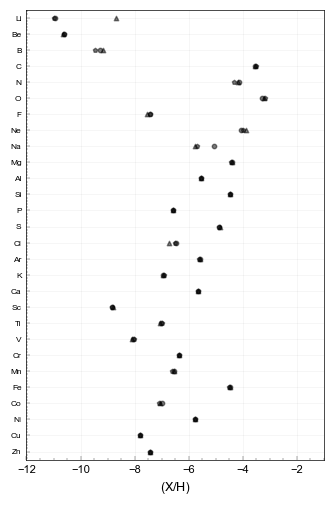

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


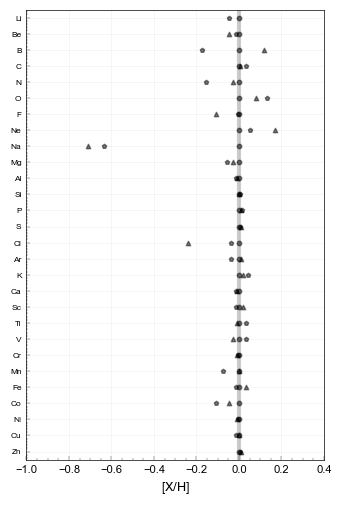

In [7]:
patterns = [Abundances(reference=reference_abundance_pattern) for reference_abundance_pattern in reference_abundance_patterns.available_patterns]

create_abundance_pattern_figure(patterns, 'solar_abundance_pattern')

reference_pattern = Abundances(reference='Asplund2009')

create_solar_relative_abundance_pattern_figure(reference_pattern, patterns, 'reference_relative_abundance_pattern')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


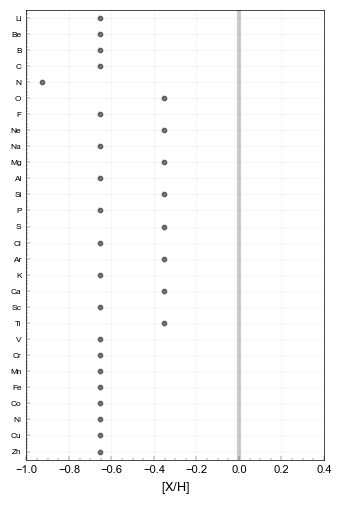

In [8]:

patterns = [Abundances(metallicity=0.005, alpha=0.3, abundances={"N": "Dopita2006"}, )]

create_solar_relative_abundance_pattern_figure(reference_pattern, patterns, 'reference_relative_abundance_pattern')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


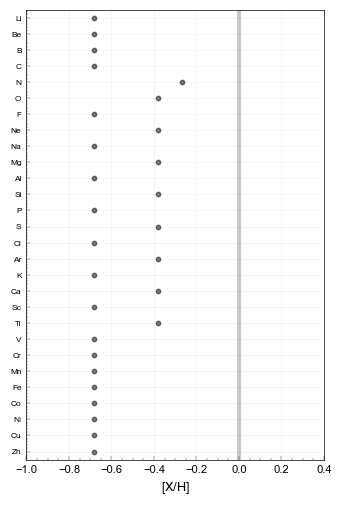

In [9]:
patterns = [Abundances(metallicity=0.005, alpha=0.3, abundances={"N/O": -0.75}, )]

create_solar_relative_abundance_pattern_figure(reference_pattern, patterns, 'solar_relative_abundance_pattern')
